# Detect License plate on cars and blur it

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
car = cv2.imread('car1.jpg')
car = cv2.cvtColor(car,cv2.COLOR_BGR2RGB)

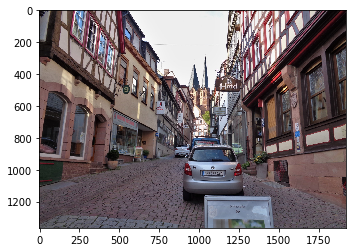

In [6]:
plt.imshow(car)

In [31]:
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,1.3,5) 
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (255,255,255), 5) 
    return plate_img

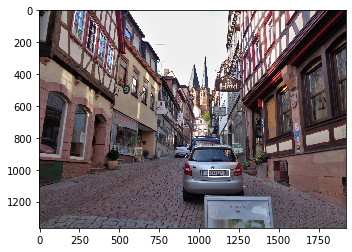

In [32]:
result = detect_plate(car)
plt.imshow(result,cmap='gray')

In [33]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

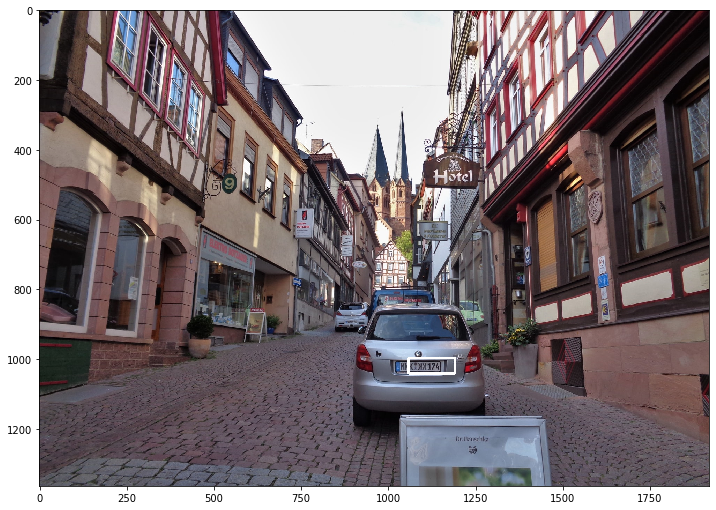

In [34]:
display_img(result)

In [35]:
car2 = cv2.imread('car2.jpg')
car3 = cv2.imread('car3.jpg')
car2 = cv2.cvtColor(car2,cv2.COLOR_BGR2RGB)
car3 = cv2.cvtColor(car3,cv2.COLOR_BGR2RGB)
result2 = detect_plate(car2)
result3 = detect_plate(car3)

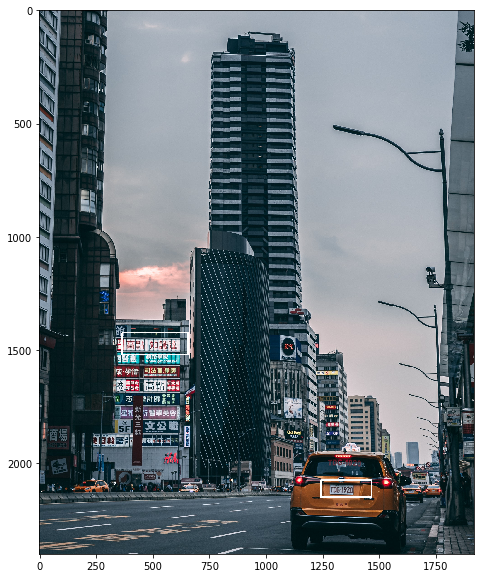

In [36]:
display_img(result2)

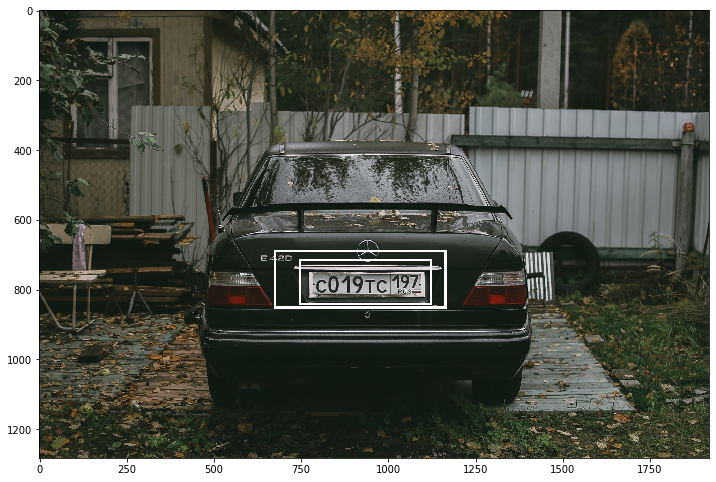

In [37]:
display_img(result3)

In [38]:
result3.shape

(1283, 1920, 3)

In [44]:
cut = result3[1000:1283,700:900]
cut = cv2.blur(cut,ksize=(7,7))
result3[1000:1283,700:900]=cut

In [67]:
def detect_plate_and_blur(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,1.3,5) 
    for (x,y,w,h) in plate_rects: 
        blur = plate_img[y:y+h,x:x+w]
        blur = cv2.blur(blur,ksize=(21,21))
        plate_img[y:y+h,x:x+w]=blur
    return plate_img

In [68]:
result_blur=detect_plate_and_blur(car)

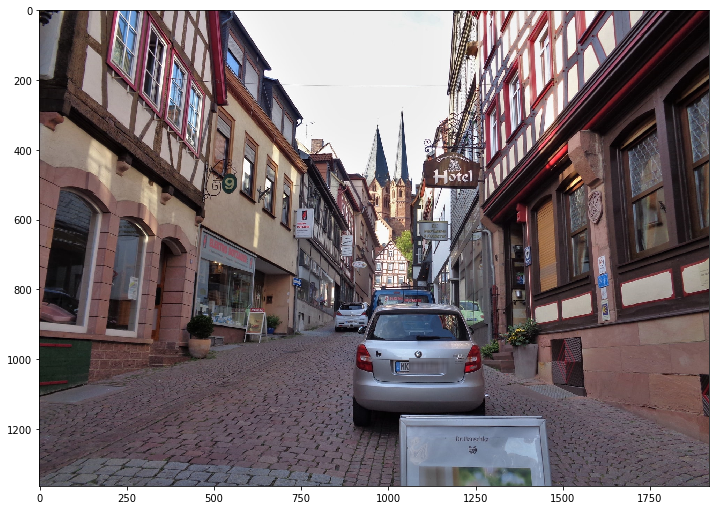

In [69]:
display_img(result_blur)

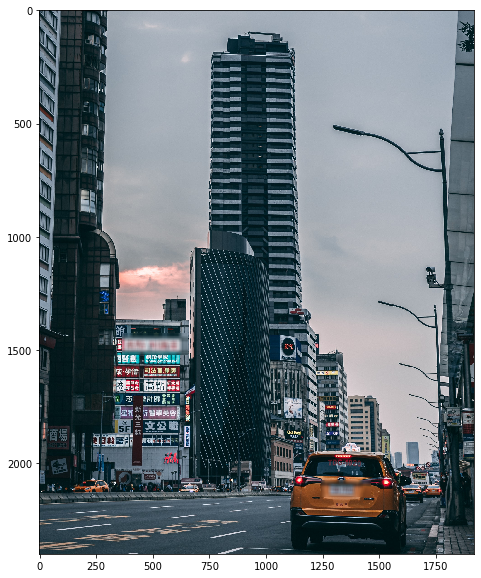

In [70]:
result2_blur = detect_plate_and_blur(car2)
display_img(result2_blur)

# What a time to be alive and can do this with only lines of code